# Business Objective:

A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.

In [1]:
# Import Necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
# Import Dataset
data=pd.read_csv("C:\\Users\Admin\Downloads\\Copy of energy_production (1).csv",sep=';')
data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


#Data Description
The variables, or features, are the following:

*Temperature, in degrees Celsius.

*Exhaust_vacuum, in cm Hg.

*amb_pressure, in millibar. (Ambient pressure)

*r_humidity, in percentage. (Relative humidity)

*energy_production, in MW, net hourly electrical energy output.



#Exploratory Data Analysis (EDA)

In [3]:
data.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [4]:
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [5]:
#Showing first 5 rows of data
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [6]:
#Showing last 5 rows of data
data.tail()


,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [7]:
# Number of rows and columns
data.shape

(9568, 5)

In [8]:
#Checking null values
data.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [9]:
# summary odf data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
# Statistically summary of data
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


*temperature, in the range 1.81°C - 37.11°C .
exhaust_vacuum, in the range 25.36 Hg - 81.56 cm Hg. amb_pressure (Ambient pressure), in the range 992.89 milibar -1033.30 millibar. r_humidity (Relative humidity), in the range 25.56% to 100.16% . energy_production, in the range 420.26 - 495.76 MW, net hourly electrical energy output.

In [11]:
# checking Duplicate values
data[data.duplicated()].shape

(41, 5)

In [12]:
# showing duplicated values
data[data.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [13]:
# Clean Duplicated values
data_cleaned=data.drop_duplicates().reset_index(drop=True)
data_cleaned.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [14]:
#No duplicated data shape
data_cleaned.shape

(9527, 5)

In [15]:
data_cleaned.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


#Data Visualization

In [16]:
data_cleaned.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

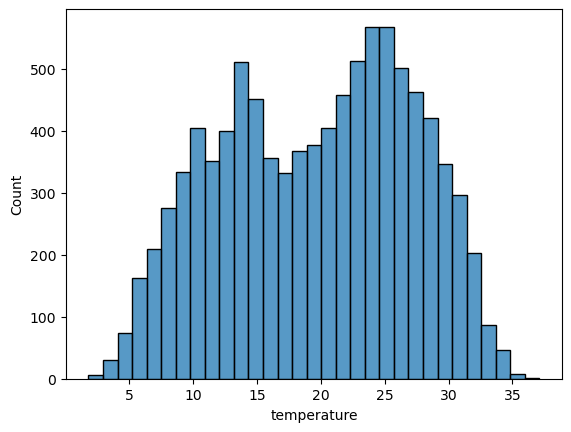

In [17]:
# checking data Distribution
sns.histplot(data_cleaned['temperature'])
plt.show()

In [18]:
data_cleaned['temperature'].skew()

-0.1361069178515444

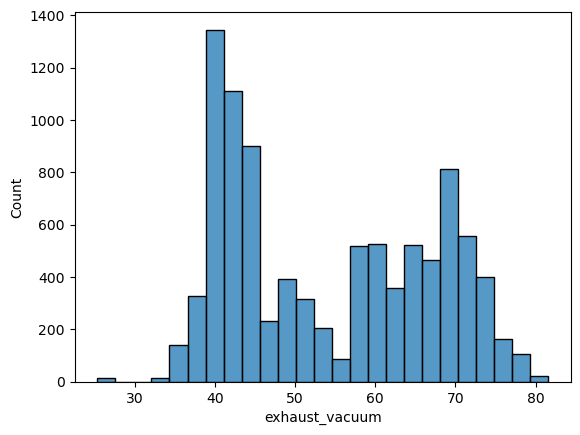

In [19]:
sns.histplot(data_cleaned['exhaust_vacuum'])
plt.show()

In [20]:
data_cleaned['exhaust_vacuum'].skew()

0.1968187812768364

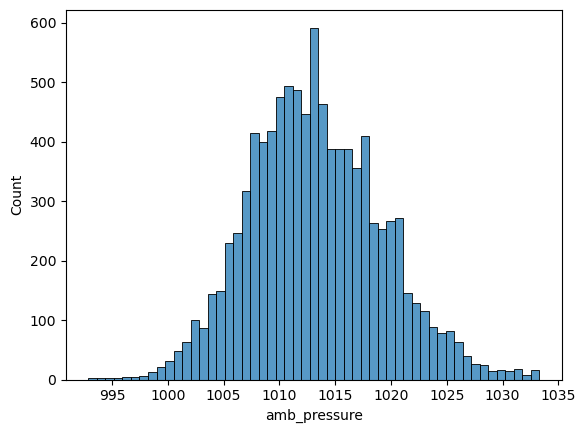

In [21]:
sns.histplot(data_cleaned['amb_pressure'])
plt.show()

In [22]:
data_cleaned['amb_pressure'].skew()

0.273845628693525

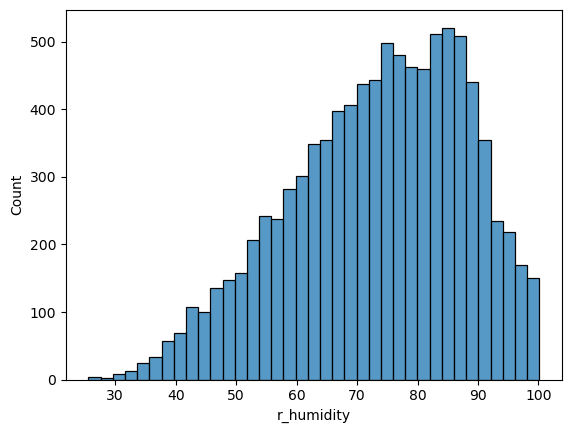

In [23]:
sns.histplot(data_cleaned['r_humidity'])
plt.show()

In [24]:
data_cleaned['r_humidity'].skew()

-0.43513848893895307

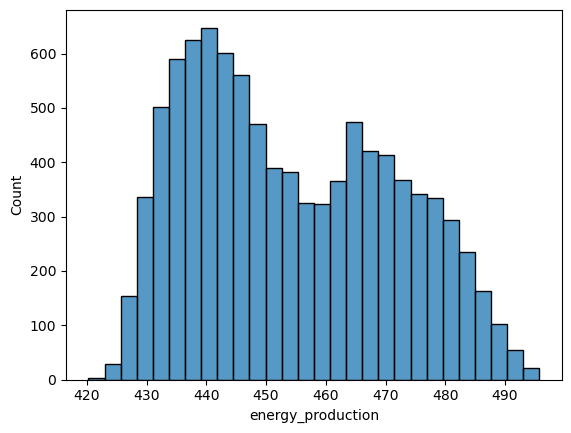

In [25]:
sns.histplot(data_cleaned['energy_production'])
plt.show()

In [26]:
data_cleaned['energy_production'].skew()

0.3057905126118896

-Temperature is more normally distributed

-exhaust_vacuum is less normally distributed

-amb_pressure is normally distrubuted

-r_humidity is left skewed,normally distributed

-energy_Production It has 2 peaks with normally distributed plot

#Checking Outlier

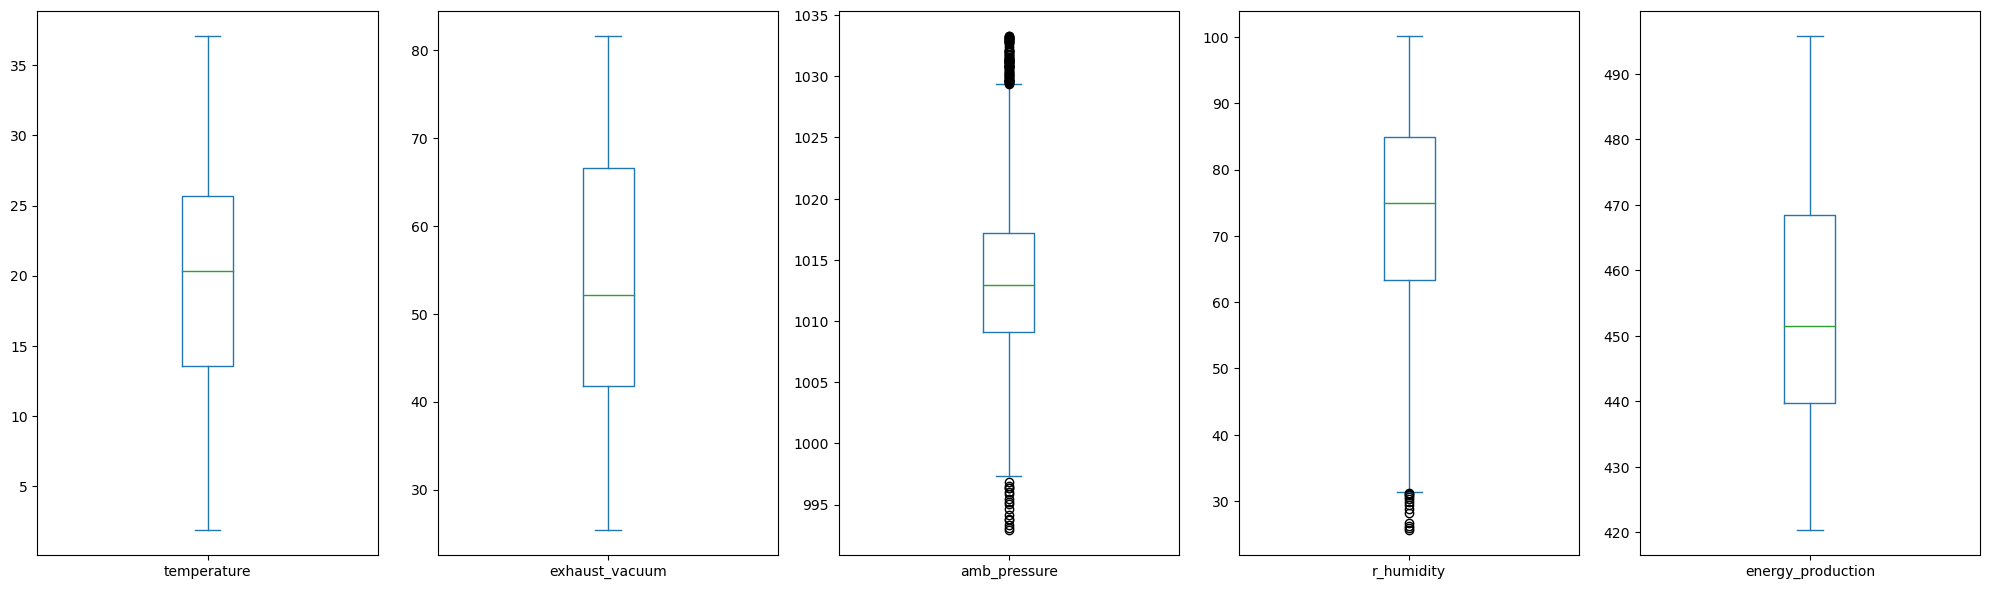

In [27]:
data_cleaned.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

-we can say that Ambient Pressure and Relative Humidity has some outliers

In [28]:
#outlier remove
data_cleaned.drop(data_cleaned.index[data_cleaned['amb_pressure']>1029], inplace=True)
data_cleaned.drop(data_cleaned.index[data_cleaned['amb_pressure']<997], inplace=True)
data_cleaned.drop(data_cleaned.index[data_cleaned['r_humidity']<31], inplace=True)

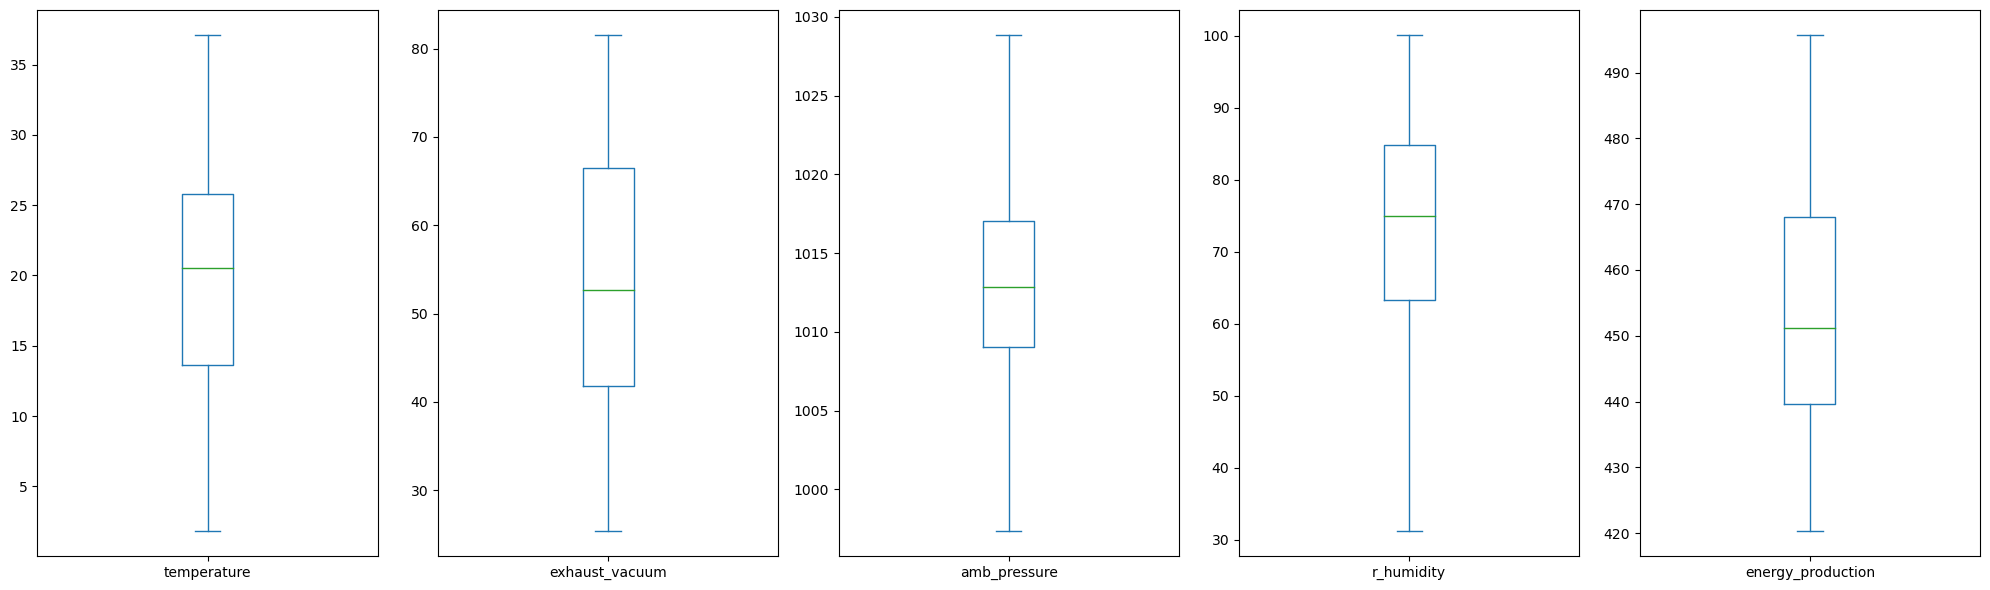

In [29]:
data_cleaned.plot(kind='box', subplots=True, figsize=(20,6))
plt.tight_layout()

No Outlier in data set

In [30]:
data_cleaned.shape

(9416, 5)

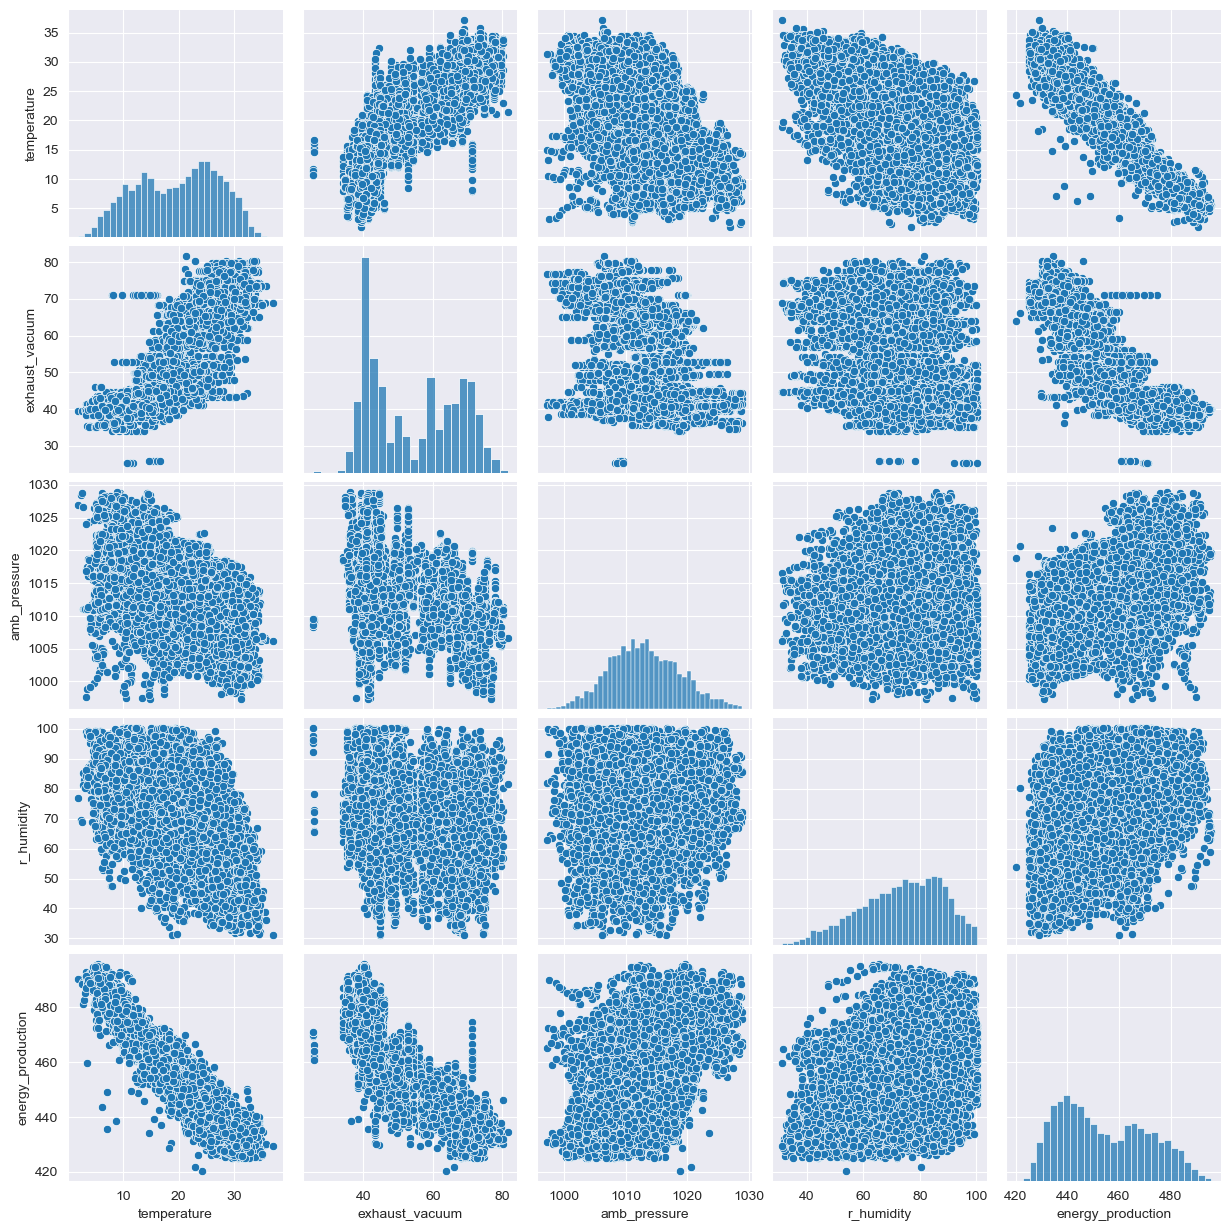

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(data_cleaned)

#Checking Correlation

In [32]:
corr_matrix=data_cleaned.corr()
corr_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.842231,-0.509005,-0.543672,-0.947242
exhaust_vacuum,0.842231,1.000000,-0.417355,-0.310233,-0.868760
amb_pressure,-0.509005,-0.417355,1.000000,0.107419,0.521276
r_humidity,-0.543672,-0.310233,0.107419,1.000000,0.389424
energy_production,-0.947242,-0.868760,0.521276,0.389424,1.000000


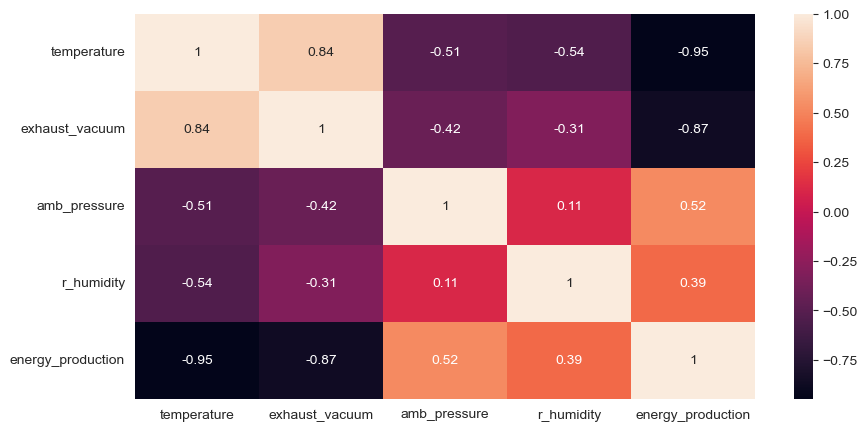

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True)
plt.show()

-We observed co relation matrix and heatmap, temperature and exhaust_vacuum have strong negative co relation.with the output variable Energy_production

-The amb_pressure and r_humidity weak positive co relationwith output variable energy_production

#Checking Missing values





In [34]:
pip install klib


Note: you may need to restart the kernel to use updated packages.


In [35]:
import klib

In [36]:
klib.missingval_plot(data_cleaned)

No missing values found in the dataset.


#Distribution plot

<Axes: xlabel='temperature', ylabel='Density'>

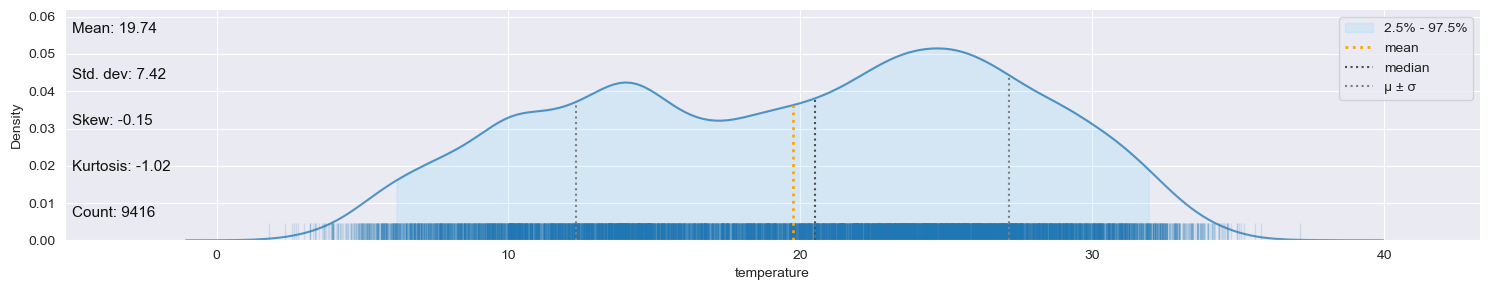

In [37]:
klib.dist_plot(data_cleaned)

#Checking Correlation

In [38]:
#correlation matrix
klib.corr_mat(data_cleaned)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.00,0.84,-0.51,-0.54,-0.95
exhaust_vacuum,0.84,1.00,-0.42,-0.31,-0.87
amb_pressure,-0.51,-0.42,1.00,0.11,0.52
r_humidity,-0.54,-0.31,0.11,1.00,0.39
energy_production,-0.95,-0.87,0.52,0.39,1.00


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

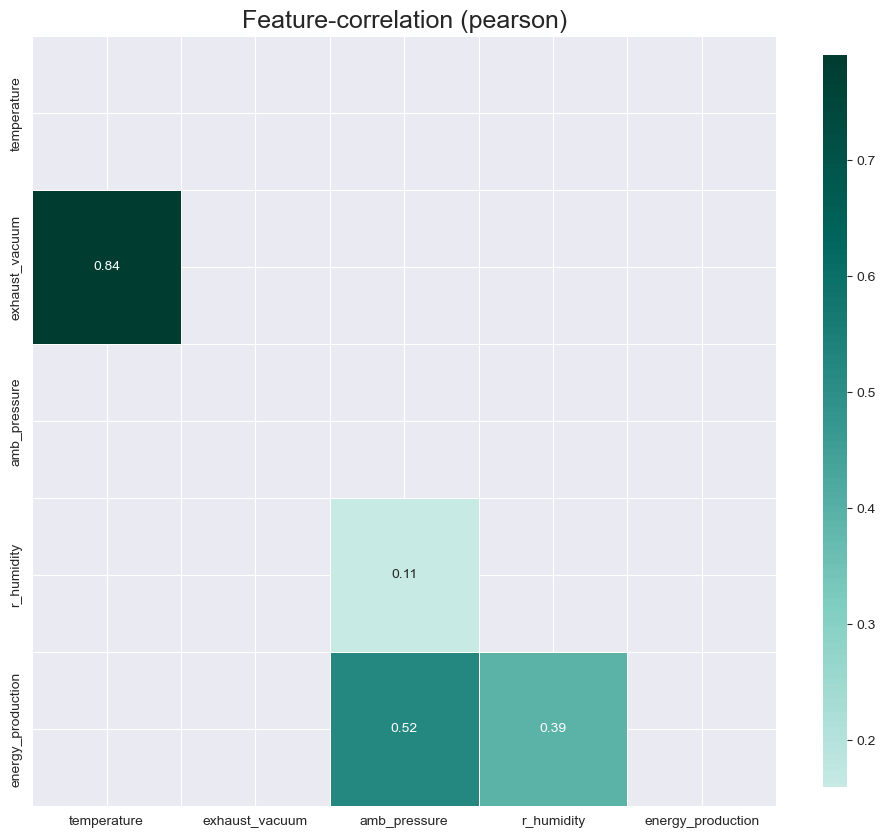

In [39]:
# Checking positive Correlation
klib.corr_plot(data_cleaned,split="pos")

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

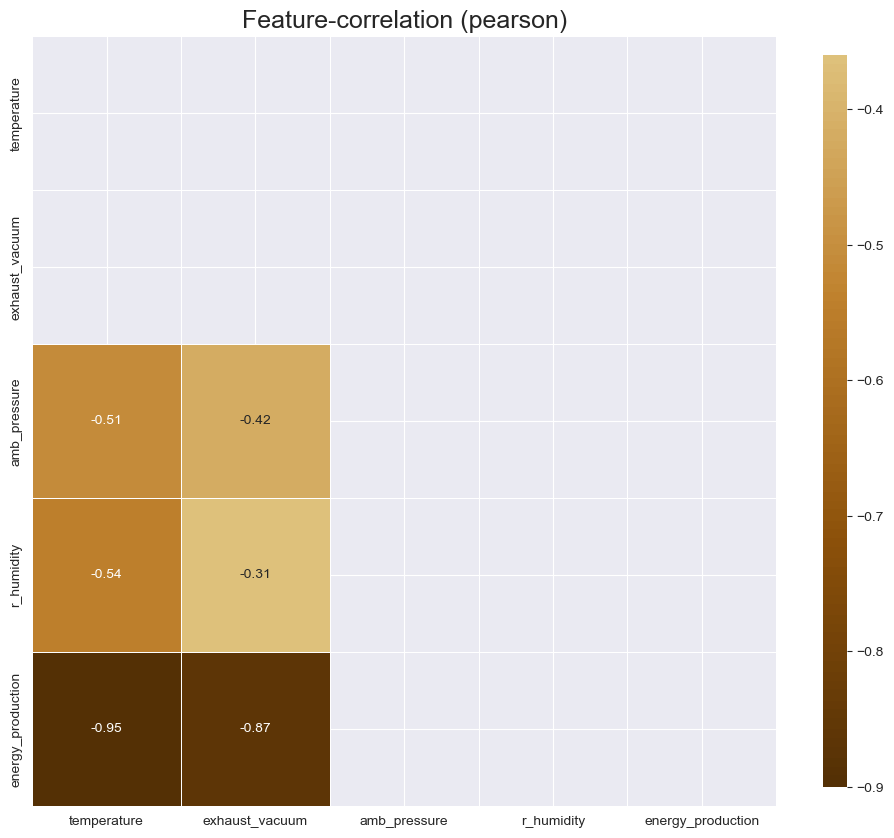

In [40]:
# checking negative Correlation
klib.corr_plot(data_cleaned,split="neg")

<Axes: title={'center': 'Feature-correlation (pearson)'}>

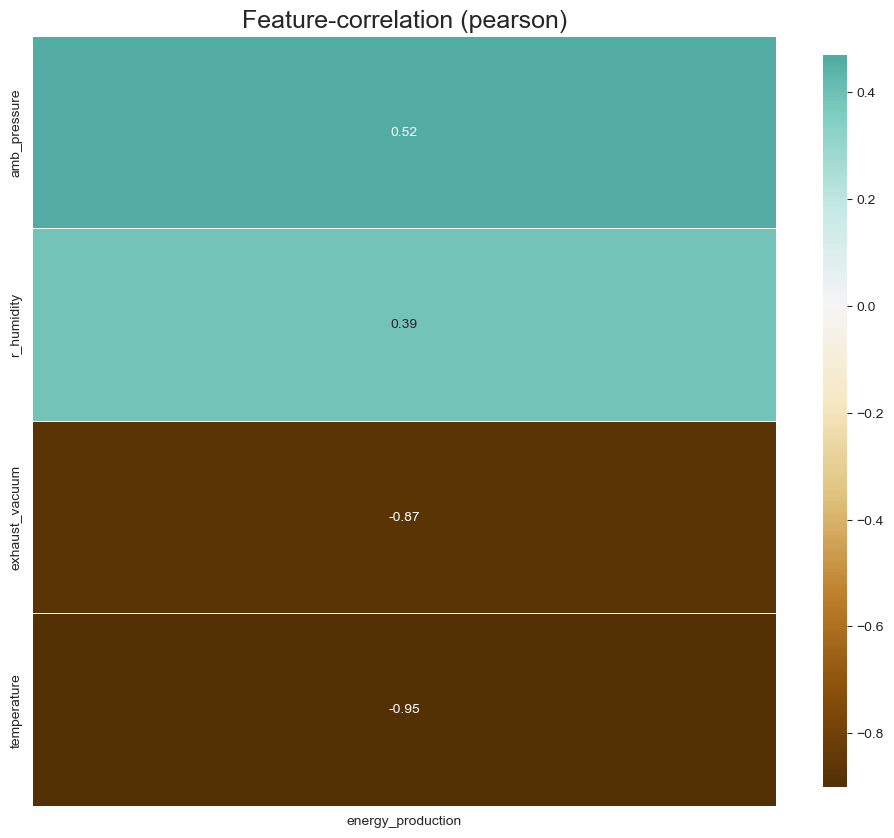

In [41]:
# correlation with a target variable
klib.corr_plot(data_cleaned,target='energy_production')

we observed co relation plot and heatmap, temperature and exhaust_vacuum have strong negative co relation.with the target variable Energy_production.

the amb_pressure and r_humidity weak positive co relationwith target variable energy_production.

In [42]:
from sklearn import preprocessing

In [43]:
#normalizing the data:
data_norm=preprocessing.normalize(data_cleaned)
print(data_norm)

[[0.0085059  0.03420099 0.90204217 0.053306   0.42689147]
 [0.01069519 0.03761084 0.90582255 0.08409585 0.4133817 ]
 [0.01228345 0.03992343 0.90723954 0.07234572 0.41223508]
 ...
 [0.02776475 0.0512973  0.91684797 0.0512973  0.39160707]
 [0.02073247 0.05953824 0.91998976 0.07237434 0.38000811]
 [0.01584166 0.04395503 0.91110523 0.05682471 0.40555544]]


In [44]:
data_norm=pd.DataFrame(data_norm)
print(data_norm)

             0         1         2         3         4
0     0.008506  0.034201  0.902042  0.053306  0.426891
1     0.010695  0.037611  0.905823  0.084096  0.413382
2     0.012283  0.039923  0.907240  0.072346  0.412235
3     0.012205  0.048305  0.905506  0.070349  0.415484
4     0.013427  0.044025  0.907975  0.066516  0.411142
...        ...       ...       ...       ...       ...
9411  0.015421  0.044810  0.906771  0.073784  0.412404
9412  0.022222  0.058713  0.912432  0.047445  0.401592
9413  0.027765  0.051297  0.916848  0.051297  0.391607
9414  0.020732  0.059538  0.919990  0.072374  0.380008
9415  0.015842  0.043955  0.911105  0.056825  0.405555

[9416 rows x 5 columns]


,0,1,2,3,4
0,1.000000,0.851161,0.941456,-0.509108,-0.932302
1,0.851161,1.000000,0.827240,-0.283571,-0.879679
2,0.941456,0.827240,1.000000,-0.488616,-0.983694
3,-0.509108,-0.283571,-0.488616,1.000000,0.343622
4,-0.932302,-0.879679,-0.983694,0.343622,1.000000


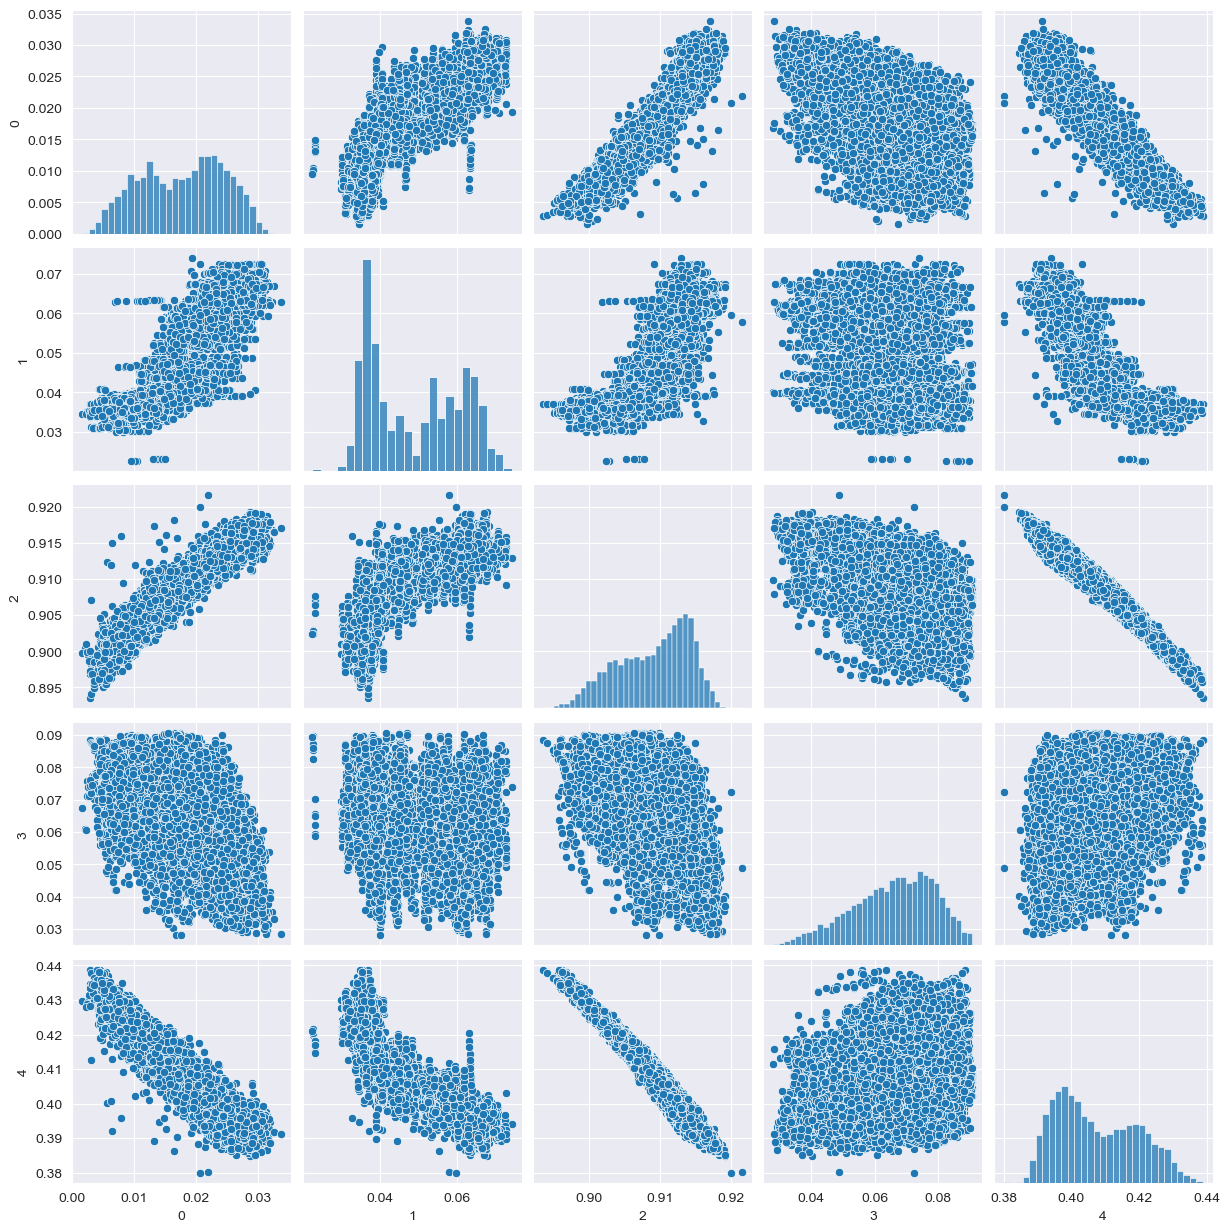

In [45]:
sns.pairplot(data_norm)
data_norm.corr()

In [46]:
data_norm.columns = data.columns
data_norm.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142


In [47]:
x=data_norm.iloc[:,0:4]
y=data_norm.iloc[:,4]

In [48]:
x

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,0.008506,0.034201,0.902042,0.053306
1,0.010695,0.037611,0.905823,0.084096
2,0.012283,0.039923,0.907240,0.072346
3,0.012205,0.048305,0.905506,0.070349
4,0.013427,0.044025,0.907975,0.066516
...,...,...,...,...
9411,0.015421,0.044810,0.906771,0.073784
9412,0.022222,0.058713,0.912432,0.047445
9413,0.027765,0.051297,0.916848,0.051297
9414,0.020732,0.059538,0.919990,0.072374


In [49]:
y

0       0.426891
1       0.413382
2       0.412235
3       0.415484
4       0.411142
          ...   
9411    0.412404
9412    0.401592
9413    0.391607
9414    0.380008
9415    0.405555
Name: energy_production, Length: 9416, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#splitting the data set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7532, 4)
(1884, 4)


In [52]:
print(y_train.shape)
print(y_test.shape)

(7532,)
(1884,)


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
reg_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [55]:
y_pred = reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
random_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(random_rmse)


0.00033176224716679044


In [56]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.00022899602606753116
MSE: 1.1006618864515853e-07
RMSE: 0.00033176224716679044


In [57]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred)

0.9992244322830782

# KNN MOdel

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
y_pred= knn_model.predict(X_test)

In [60]:
KNN_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(KNN_rmse)

0.0011709283390242372


In [61]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 0.0008403014729268706
MSE: 1.3710731751300588e-06
RMSE: 0.0011709283390242372


In [62]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred)

0.9903413304504591

# Bagging meta Estimator

In [63]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

In [64]:
bag_model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
bag_model.fit(X_train, y_train)

from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

AdaBoostRegressor()

In [65]:
y_pred= bag_model.predict(X_test)
Bag_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(Bag_rmse)

0.00032906665947139853


In [66]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.00023034388120423527
MSE: 1.0828486637566537e-07
RMSE: 0.00032906665947139853


In [67]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred)


0.9992368664369413

# Adaboost

In [68]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

AdaBoostRegressor()

In [69]:
y_pred= ada_model.predict(X_test)
Ada_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(Ada_rmse)

0.0016010041134378874


In [70]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.0012948562960728848
MSE: 2.5632141712450358e-06
RMSE: 0.0016010041134378874


In [71]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred)

0.9819461219666321

# Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model= GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [73]:
y_pred= gbm_model.predict(X_test)
gbm_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(gbm_rmse)

0.0003898436880460676


In [74]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print ("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.0003008876550616457
MSE: 1.5197810110935966e-07
RMSE: 0.0003898436880460676


In [75]:
#Evaluation of  the explained variance score (R^2)
metrics.explained_variance_score(y_test,y_pred)

0.9989289397238496

In [76]:
Result=pd.DataFrame({"Model":["Random Forest","KNN","Bagging","Adaboost","GBM"],"RMSE":[random_rmse,KNN_rmse,Bag_rmse,Ada_rmse,gbm_rmse]})

In [77]:
Result=Result.sort_values(by='RMSE')

In [78]:
Result=Result.reset_index(drop=True)

In [79]:
Result

,Model,RMSE
0,Bagging,0.000329
1,Random Forest,0.000332
2,GBM,0.000390
3,KNN,0.001171
4,Adaboost,0.001601


# conclusion:
#### Form all the above models We considering Bagging as final model because the RMSE value of Bagging is good as compare to other models.